In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Loading data

In [5]:
raw_df = pd.read_csv("./data/hotel_bookings_clean.csv", low_memory=False)
df = raw_df.copy()

### Explore data

In [6]:
df.shape

(56501, 32)

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##### Create a new column for total nights

In [8]:
df['total_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### Univariate Analisys
##### The following attributes are selected as relevenat for univariate analisys

##### Categorical variables

In [10]:
#relative frecuency of is_canceled
df['is_canceled'].value_counts(dropna=False, normalize=True)

is_canceled
0    0.586007
1    0.413993
Name: proportion, dtype: float64

In [11]:
df['market_segment'].value_counts(dropna=False, normalize=True)

market_segment
Online TA        0.439798
Offline TA/TO    0.212279
Groups           0.177784
Direct           0.123927
Corporate        0.041557
Complementary    0.004283
Aviation         0.000372
Name: proportion, dtype: float64

In [12]:
#relative frecuency of Hotel
df['hotel'].value_counts(dropna=False, normalize=True)

hotel
Resort Hotel    0.677386
City Hotel      0.322614
Name: proportion, dtype: float64

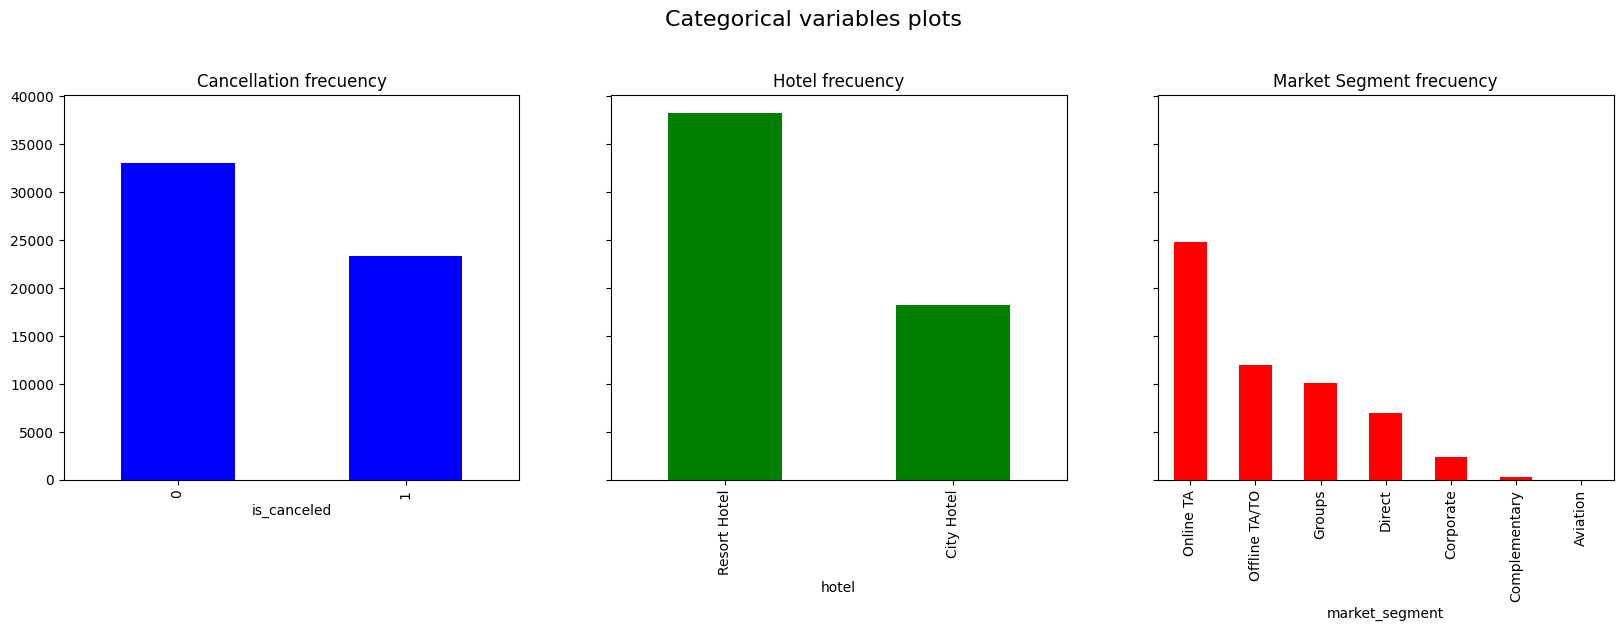

In [13]:
fig, (plt1,plt2,plt3)= plt.subplots(1,3, sharey=True, figsize=(20, 5))
df['is_canceled'].value_counts().plot(kind='bar',ax=plt1, color='blue')
df['hotel'].value_counts().plot(kind='bar',ax=plt2, color='green')
df['market_segment'].value_counts().plot(kind='bar',ax=plt3, color='red')
plt1.set_title("Cancellation frecuency")
plt2.set_title("Hotel frecuency")
plt3.set_title("Market Segment frecuency")
fig.suptitle("Categorical variables plots", fontsize=16, y=1.05)
plt.show()

##### Numeric variables

In [14]:
#statistics of lead_time
df['lead_time'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    56501.000000
mean       100.544610
std        101.160815
min          0.000000
5%           0.000000
25%         17.000000
50%         69.000000
75%        158.000000
95%        309.000000
max        737.000000
Name: lead_time, dtype: float64

In [15]:
#statistics of adr
df['adr'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    56501.000000
mean        96.484815
std         54.296987
min          0.000000
5%          34.510000
25%         60.000000
50%         84.710000
75%        120.270000
95%        207.900000
max        508.000000
Name: adr, dtype: float64

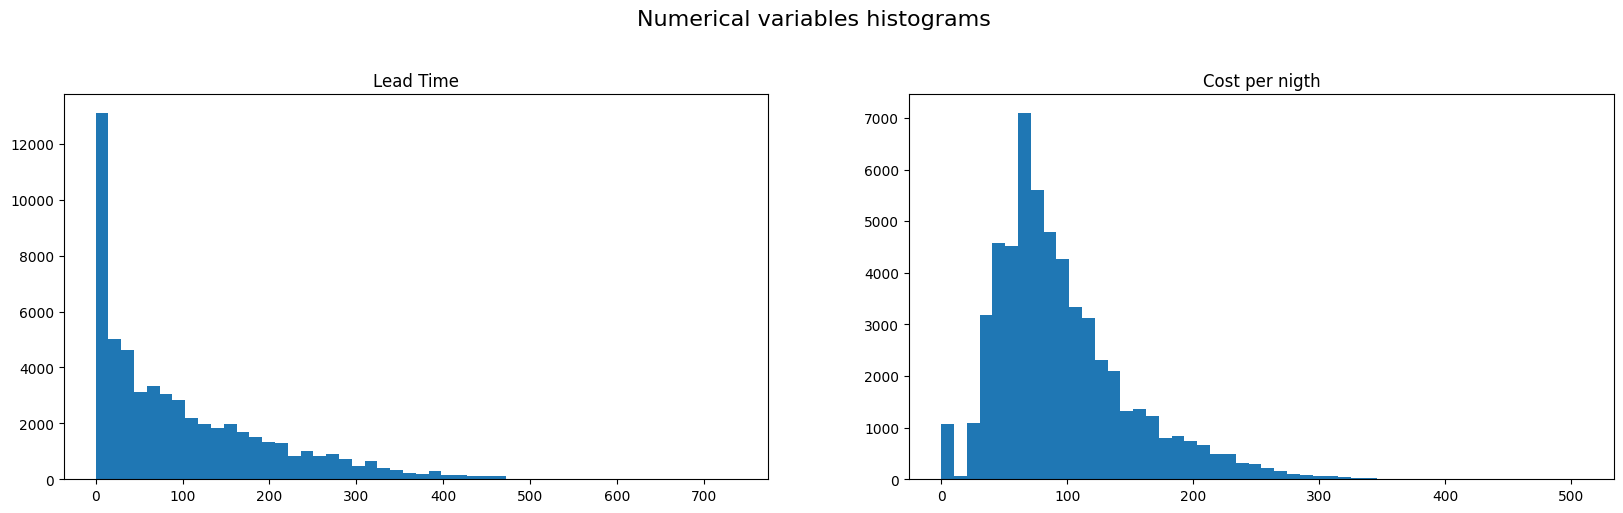

In [16]:
fig, (plt1,plt2)= plt.subplots(1,2, figsize=(20, 5))

plt1.hist(df["lead_time"], bins=50)
plt1.set_title("Lead Time")

plt2.hist(df["adr"], bins=50)
plt2.set_title("Cost per nigth")

fig.suptitle("Numerical variables histograms", fontsize=16, y=1.05)
plt.show()

### Bivariate Analisys

##### Cancelation rate per segment (categorical variables)

In [17]:
summary_hotel = (
    df.groupby("hotel")["is_canceled"].agg(
        bookings=("count"),
        cancelations=("sum"),
        cancelation_rate=("mean")
    ).sort_values("cancelation_rate", ascending=False)
)
summary_hotel["share_of_total_bookings"] = (summary_hotel["bookings"] / summary_hotel["bookings"].sum())
summary_hotel["share_of_total_cancellations"] = (summary_hotel["cancelations"] / summary_hotel["cancelations"].sum())

display(summary_hotel)

,bookings,cancelations,cancelation_rate,share_of_total_bookings,share_of_total_cancellations
hotel,,,,,
City Hotel,18228,12681,0.695688,0.322614,0.542132
Resort Hotel,38273,10710,0.279832,0.677386,0.457868


In [18]:
summary_market = (
    df.groupby("market_segment")["is_canceled"].agg(
        bookings=("count"),
        cancelations=("sum"),
        cancelation_rate=("mean")
    ).sort_values("cancelation_rate", ascending=False)
)
summary_market["share_of_total_bookings"] = (summary_market["bookings"] / summary_hotel["bookings"].sum())
summary_market["share_of_total_cancellations"] = (summary_market["cancelations"] / summary_hotel["cancelations"].sum())

display(summary_market)

,bookings,cancelations,cancelation_rate,share_of_total_bookings,share_of_total_cancellations
market_segment,,,,,
Aviation,21,21,1.000000,0.000372,0.000898
Groups,10045,5349,0.532504,0.177784,0.228678
Online TA,24849,11601,0.466860,0.439798,0.495960
Offline TA/TO,11994,4614,0.384692,0.212279,0.197255
Corporate,2348,505,0.215077,0.041557,0.021590
Complementary,242,46,0.190083,0.004283,0.001967
Direct,7002,1255,0.179235,0.123927,0.053653


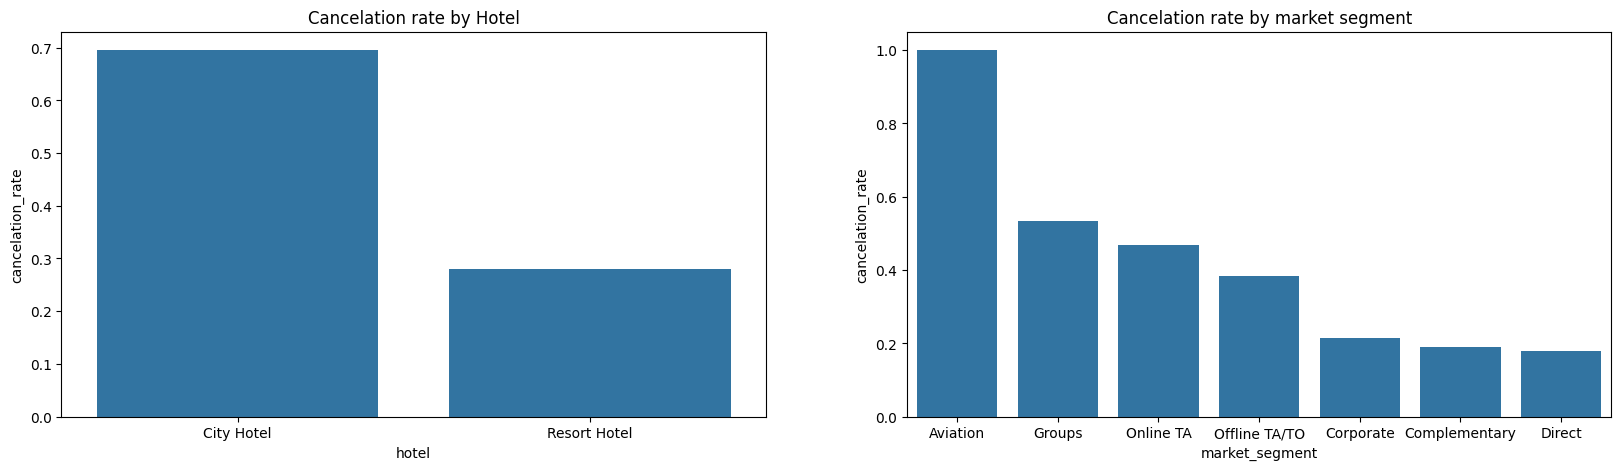

In [132]:
data_plot1=summary_hotel.reset_index()
data_plot2=summary_market.reset_index()

fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=data_plot1["hotel"],
    y=data_plot1["cancelation_rate"],
    ax=ax1
)
ax1.set_title("Cancelation rate by Hotel")

sns.barplot(
    x=data_plot2["market_segment"],
    y=data_plot2["cancelation_rate"],
    ax=ax2
)
ax2.set_title("Cancelation rate by market segment")

plt.show()


##### Cancelation rate per segment (numerical variables quantiles)

In [101]:
df["lead_time_bin"] = pd.qcut(df["lead_time"], q=10, duplicates="drop")

summary_lead_time = (
    df.groupby("lead_time_bin")["is_canceled"].agg(
        bookings=("count"),
        cancelations=("sum"),
        cancelation_rate=("mean")
    ).sort_values("lead_time_bin", ascending=True)
)
summary_lead_time["share_of_total_bookings"] = (summary_lead_time["bookings"] / summary_lead_time["bookings"].sum())
summary_lead_time["share_of_total_cancellations"] = (summary_lead_time["cancelations"] / summary_lead_time["cancelations"].sum())

display(summary_lead_time)

/var/folders/74/vhrkgctn4bj1sy7nvfdl1x740000gn/T/ipykernel_7422/4285090934.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("lead_time_bin")["is_canceled"].agg(


,bookings,cancelations,cancelation_rate,share_of_total_bookings,share_of_total_cancellations
lead_time_bin,,,,,
"(-0.001, 2.0]",6303,664,0.105347,0.111556,0.028387
"(2.0, 10.0]",5067,960,0.189461,0.089680,0.041041
"(10.0, 26.0]",5802,1972,0.339883,0.102688,0.084306
"(26.0, 44.0]",5563,2472,0.444365,0.098458,0.105682
"(44.0, 69.0]",5538,2488,0.449260,0.098016,0.106366
"(69.0, 98.0]",5800,2803,0.483276,0.102653,0.119832
"(98.0, 135.0]",5511,2938,0.533116,0.097538,0.125604
"(135.0, 181.0]",5720,2779,0.485839,0.101237,0.118806
"(181.0, 251.0]",5558,2838,0.510615,0.098370,0.121329


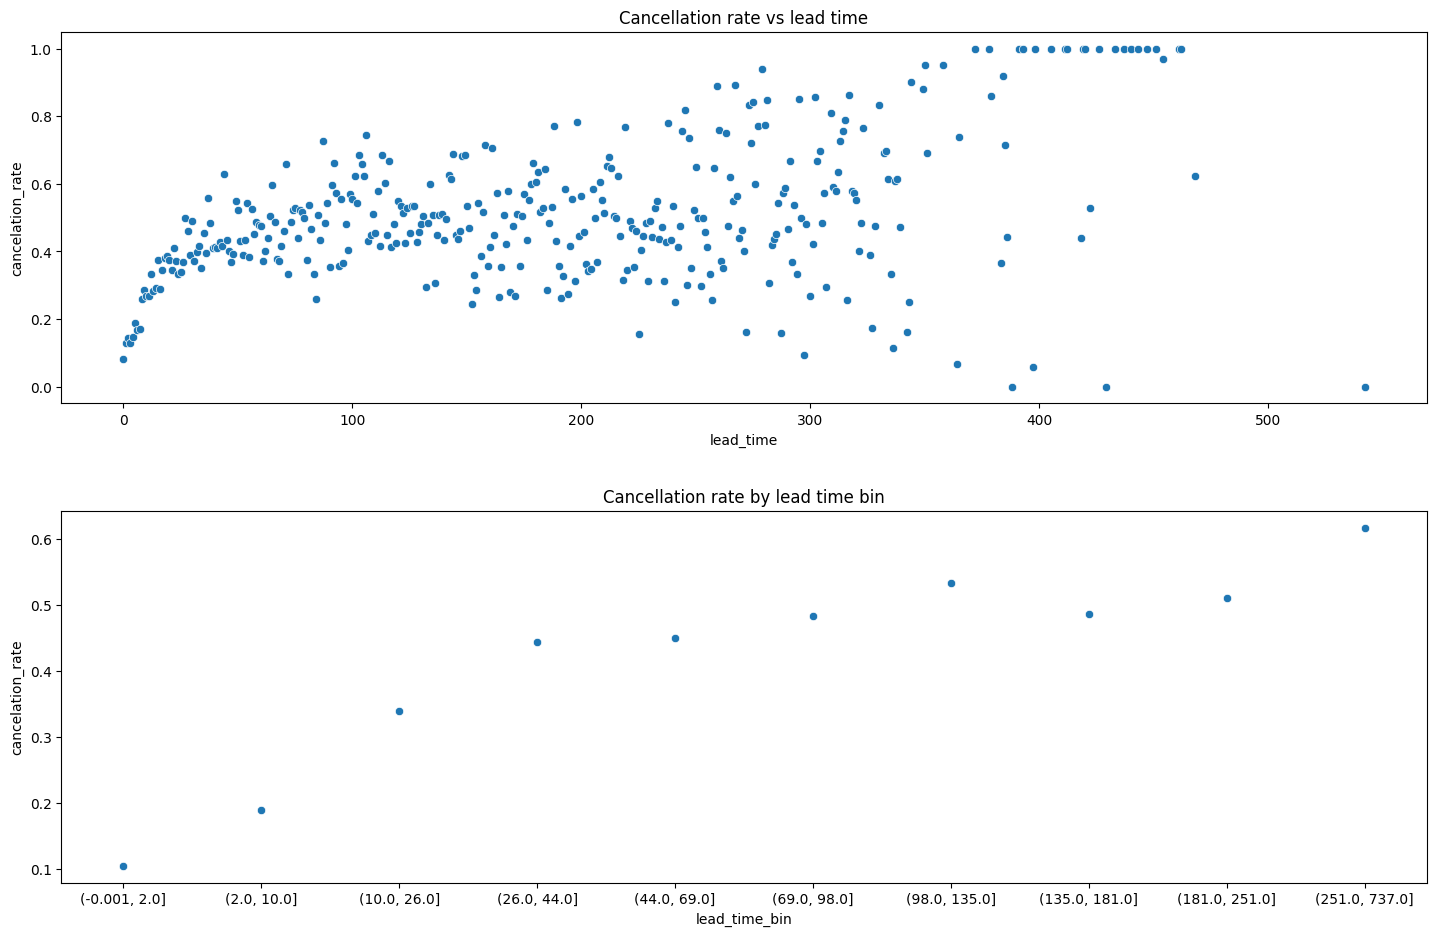

In [116]:
plot_data1 = (
    df.groupby("lead_time")["is_canceled"].agg(
        bookings="count",
        cancelations="sum",
        cancelation_rate="mean"
    )
    .query("bookings > 12")   # keep only groups with >12 bookings (percentile 5)
    .sort_values("lead_time", ascending=True)
    .reset_index()
)

plot_data2 = summary_lead_time.reset_index()

fig, (ax1,ax2)= plt.subplots(2,1, figsize=(15, 10))

sns.scatterplot(
    x=plot_data1["lead_time"], 
    y=plot_data1["cancelation_rate"],
    ax=ax1
    )
ax1.set_title("Cancellation rate vs lead time")

sns.scatterplot(
    x=plot_data2["lead_time_bin"].astype(str), 
    y=plot_data2["cancelation_rate"],
    ax=ax2
    )
ax2.set_title("Cancellation rate by lead time bin")

plt.tight_layout(pad=3.0)
plt.show()

In [117]:
df["adr_bin"] = pd.qcut(df["adr"], q=10, duplicates="drop")

summary_adr = (
    df.groupby("adr_bin")["is_canceled"].agg(
        bookings=("count"),
        cancelations=("sum"),
        cancelation_rate=("mean")
    ).sort_values("adr_bin", ascending=True)
)
summary_adr["share_of_total_bookings"] = (summary_adr["bookings"] / summary_adr["bookings"].sum())
summary_adr["share_of_total_cancellations"] = (summary_adr["cancelations"] / summary_adr["cancelations"].sum())

display(summary_adr)

/var/folders/74/vhrkgctn4bj1sy7nvfdl1x740000gn/T/ipykernel_7422/2271790857.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("adr_bin")["is_canceled"].agg(


,bookings,cancelations,cancelation_rate,share_of_total_bookings,share_of_total_cancellations
adr_bin,,,,,
"(-0.001, 41.98]",5651,1280,0.226509,0.100016,0.054722
"(41.98, 54.9]",5653,1281,0.226605,0.100051,0.054765
"(54.9, 63.4]",5648,2367,0.419086,0.099963,0.101193
"(63.4, 73.15]",5649,2036,0.360418,0.099981,0.087042
"(73.15, 84.71]",5650,2386,0.422301,0.099998,0.102005
"(84.71, 96.0]",5691,2568,0.451239,0.100724,0.109786
"(96.0, 111.6]",5622,2848,0.506581,0.099503,0.121756
"(111.6, 133.0]",5659,3354,0.592684,0.100158,0.143388
"(133.0, 171.0]",5638,2907,0.515608,0.099786,0.124279


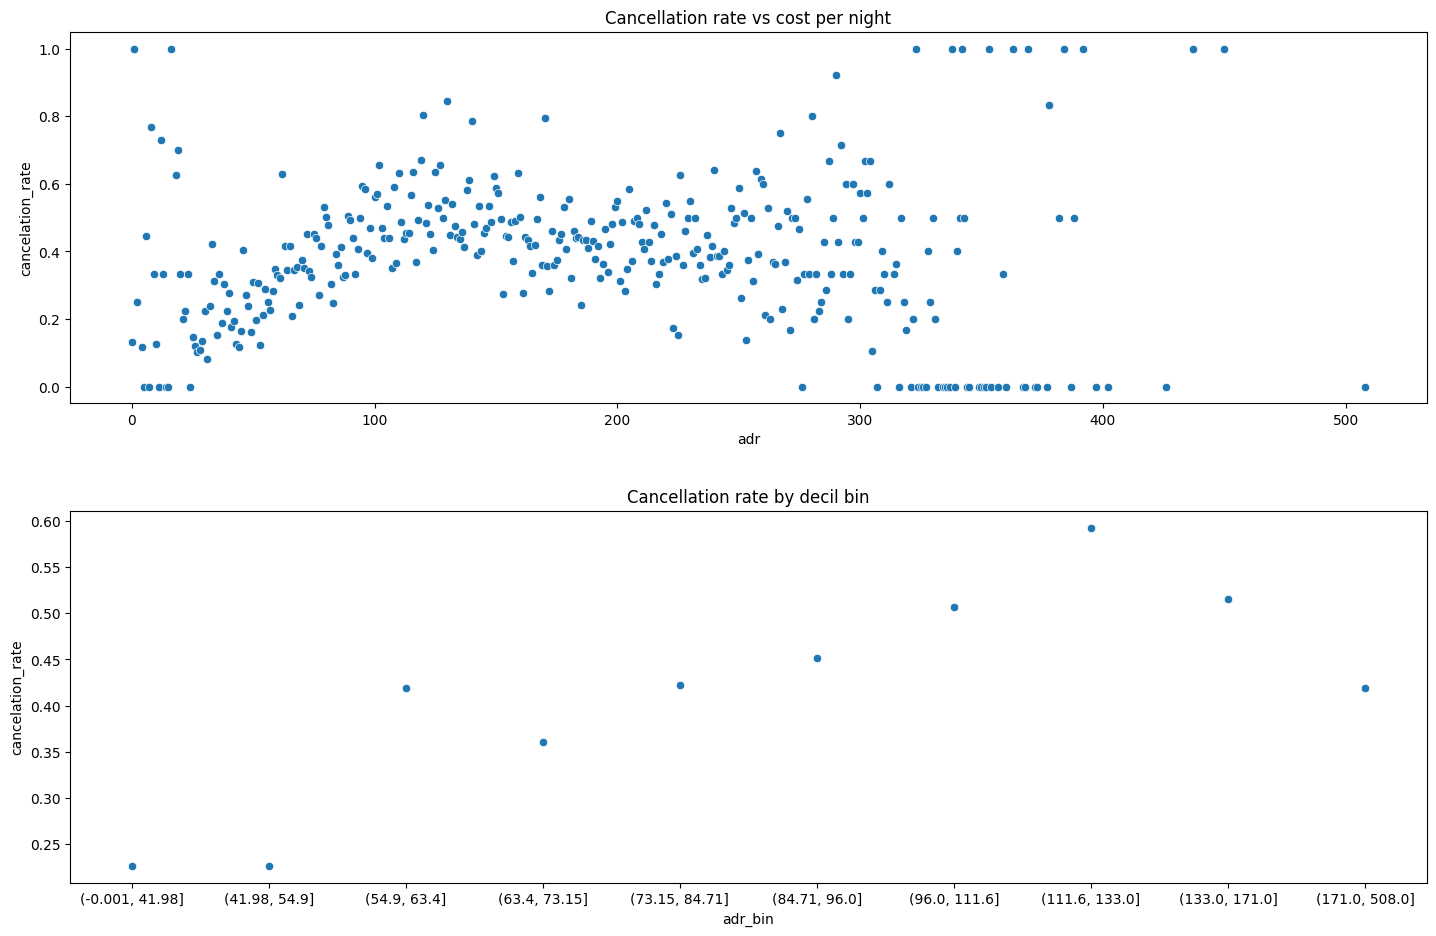

In [122]:
plot_data1 = (
    df.groupby(df["adr"].round(0))["is_canceled"].agg(
        bookings="count",
        cancelations="sum",
        cancelation_rate="mean"
    )
    #.query("bookings > 12")   # keep only groups with >12 bookings (percentile 5)
    .sort_values("adr", ascending=True)
    .reset_index()
)

plot_data2 = summary_adr.reset_index()

fig, (ax1,ax2)= plt.subplots(2,1, figsize=(15, 10))

sns.scatterplot(
    x=plot_data1["adr"], 
    y=plot_data1["cancelation_rate"],
    ax=ax1
    )
ax1.set_title("Cancellation rate vs cost per night")

sns.scatterplot(
    x=plot_data2["adr_bin"].astype(str), 
    y=plot_data2["cancelation_rate"],
    ax=ax2
    )
ax2.set_title("Cancellation rate by decil bin")

plt.tight_layout(pad=3.0)
plt.show()

### PCA

In [133]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [158]:
# Optional: create total_nights if not already present
df["total_nights"] = df["stays_in_week_nights"].fillna(0) + df["stays_in_weekend_nights"].fillna(0)

# Choose features
features_num = ["lead_time", "adr"]
features_cat = ["hotel", "market_segment"]

# One-hot encode categoricals
X_cat = pd.get_dummies(df[features_cat], drop_first=True)
X_num = df[features_num].astype(float).fillna(0)

X = pd.concat([X_num, X_cat], axis=1)

y = df["is_canceled"].astype(int)  # for coloring only

#### PC 2 components 2D view

In [159]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(Z, columns=["PC1","PC2"])
pc_df["is_canceled"] = y.values

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 4))
print("Cumulative variance explained:", np.round(pca.explained_variance_ratio_.sum(), 4))

Explained variance ratio: [0.206  0.1628]
Cumulative variance explained: 0.3688


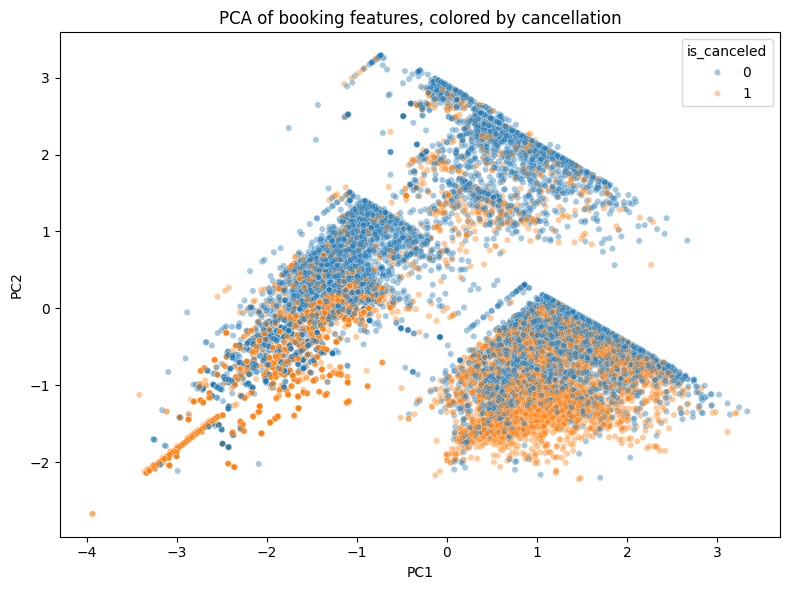

In [160]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df.sample(min(20000, len(pc_df)), random_state=42),
                x="PC1", y="PC2", hue="is_canceled", alpha=0.4, s=20)
plt.title("PCA of booking features, colored by cancellation")
plt.tight_layout()
plt.show()

In [150]:
loadings = pd.Series(pca.components_[0], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top loadings for PC1:")
print(loadings.head(10))

Top loadings for PC1:
market_segment_Online TA        0.562231
market_segment_Groups          -0.475552
lead_time                      -0.411670
adr                             0.363884
market_segment_Offline TA/TO   -0.331657
hotel_Resort Hotel              0.170454
market_segment_Direct           0.125939
market_segment_Complementary   -0.030304
market_segment_Corporate       -0.005787
dtype: float64


In [151]:
loadings = pd.Series(pca.components_[1], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top loadings for PC2:")
print(loadings.head(10))

Top loadings for PC2:
market_segment_Direct           0.500748
market_segment_Online TA       -0.441484
lead_time                      -0.379765
market_segment_Corporate        0.378843
hotel_Resort Hotel              0.359396
adr                            -0.237321
market_segment_Groups          -0.215199
market_segment_Complementary    0.136736
market_segment_Offline TA/TO    0.126912
dtype: float64


In [ ]:
csf